<a href="https://colab.research.google.com/github/chunnsss/paper/blob/main/BERT%2Bdistilbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers datasets evaluate scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.

In [ ]:
pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and

## 原本使用BERT

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

# 讀取訓練資料
df = pd.read_csv("/content/Valence-reg-En-train.txt", sep='\t')
df = df[['Tweet', 'Intensity Score']].rename(columns={'Tweet': 'text', 'Intensity Score': 'label'})

dataset = Dataset.from_pandas(df)

# 使用多語言模型
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

def preprocess(example):
    return tokenizer(example['text'], truncation=True, padding="max_length", max_length=128)

tokenized_dataset = dataset.map(preprocess, batched=True)

# 訓練參數
training_args = TrainingArguments(
    output_dir="./bert_valence_model",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer
)

trainer.train()



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1181 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-4-a27a0f73c0bf>:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.195600
20,0.080700
30,0.054000
40,0.063500
50,0.049200
60,0.067600
70,0.038300
80,0.050900
90,0.056000
100,0.059300


TrainOutput(global_step=444, training_loss=0.03495588546266427, metrics={'train_runtime': 114.9674, 'train_samples_per_second': 30.817, 'train_steps_per_second': 3.862, 'total_flos': 233048524817664.0, 'train_loss': 0.03495588546266427, 'epoch': 3.0})

In [ ]:
import torch

# 選擇裝置（若有 GPU 就用 GPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 測試幾個句子（中英文皆可）
test_sentences = [
    " 讚 超扯 ",
    "It was a terrible experience, I will never come back.",
    "這家飯店的地點很方便，但是服務態度不佳",
    "早餐非常好吃，我覺得非常適合我的口味",
    "房間有霉味，而且空調壞掉了，體驗很差"
]

# Tokenize + 搬移到 model 裝置
inputs = tokenizer(test_sentences, return_tensors="pt", padding=True, truncation=True, max_length=128)
inputs = {k: v.to(device) for k, v in inputs.items()}

# 預測
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    scores = outputs.logits.squeeze().tolist()

# 顯示預測結果
for text, score in zip(test_sentences, scores):
    valence = float(score) if isinstance(score, (int, float)) else score[0]
    print(f"【{text}】→ 預測情緒強度分數: {valence:.3f}")


【 讚 超扯 】→ 預測情緒強度分數: 0.466
【It was a terrible experience, I will never come back.】→ 預測情緒強度分數: 0.271
【這家飯店的地點很方便，但是服務態度不佳】→ 預測情緒強度分數: 0.506
【早餐非常好吃，我覺得非常適合我的口味】→ 預測情緒強度分數: 0.650
【房間有霉味，而且空調壞掉了，體驗很差】→ 預測情緒強度分數: 0.329


In [ ]:
# 1.1 儲存模型與 tokenizer: 你可以將模型存到一個指定資料夾中（包含模型權重與 tokenizer）：
save_path = "/content/bert_valence_model"

# 儲存模型與 tokenizer
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
# 1.2 掛載 Google Drive 並搬到雲端
from google.colab import drive
drive.mount('/content/drive')

# 搬到你的 Google Drive 裡
!cp -r /content/bert_valence_model /content/drive/MyDrive/


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/
!ls /content/drive/MyDrive/bert_valence_model/


 0815議程高管交流會_for實習生.xlsx
'0914(實務1).xlsx'
 1008討論.gdoc
'1012(實務2).xlsx'
'1019(學術1).xlsx'
'1102(學術2).xlsx'
'1123(實務3).xlsx'
 112學年聖誕晚會時程安排.docx
'112碩士成績單 (1).pdf'
 112碩士成績單.pdf
 1211資訊經濟學
'1214(學術3).xlsx'
'1221(學術4).xlsx'
 1446209523677.jpg
 1446261226636.jpg
 1446261228091.jpg
 1446261229632.jpg
 1446261230951.jpg
'2023業務通路經營與發展(政大風管) (1011版) (2).pdf'
'2024 TW SAP - 專案介紹.gdoc'
'2024 TW SAP - 專案介紹.pdf'
 435B6A3F-824B-4834-8D8D-A2DB568467C1.jpeg
 510E7BBB-0BEE-4533-915E-99F273C0E81B.jpeg
'7112034013_陳沛淳_應經系 (1).pdf'
 7112034013_陳沛淳_應經系.pdf
'AC 案例分析.docx'
 all_reviews-2_處理空白評論版.csv
'Bank Passbook.jpg'
 bert_valence_model
'Brother Hotel.mp4'
'Business Model Canvas Word Template - 副本 (1).gdoc'
'Business Model Canvas Word Template - 副本 (2).gdoc'
'Business Model Canvas Word Template - 副本 (3).gdoc'
'Business Model Canvas Word Template - 副本 (4).gdoc'
'Business Model Canvas Word Template - 副本.gdoc'
 ccclub保證金題目.ipynb
'Ch2(1).pdf'
 CH2.pdf
 Ch3.pdf
'Ch4(1).pdf'
'Ch5(1).pdf'
'Ch6(1).pdf'
'Colab No

In [ ]:
# 匯入必要套件
import pandas as pd                     # 處理資料表格用的
import torch                            # 使用 PyTorch 張量與模型推論
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import time                             # 計算執行時間與控制自動儲存
import os                               # 檔案與路徑管理

# ========== 1. 載入已 fine-tune 完的 BERT 模型 ==========
model_path = "/content/drive/MyDrive/bert_valence_model"  # 模型儲存位置
tokenizer = AutoTokenizer.from_pretrained(model_path)     # 載入 tokenizer，用於文字編碼
model = AutoModelForSequenceClassification.from_pretrained(model_path)  # 載入模型本身
model.eval()  # 設定模型為推論模式（非訓練）

# ========== 2. 載入待處理的原始資料（包含各面向句子）==========
df = pd.read_csv("/content/all_reviews-5_beforeBERT.csv")  # 讀取原始資料檔案

# ========== 3. 預設欄位與參數 ==========
# 七個面向欄位名稱（A1 ~ A7 的句子）
aspect_cols = [f"A{i}__sentence" for i in range(1, 8)]

# 對應要儲存的情緒分數欄位名稱
score_cols = [f"A{i}_sentiment_scores" for i in range(1, 8)]

# 篩選只處理指定範圍內的飯店（hotel_id 介於 1～5）
hotel_id_start = 1
hotel_id_end = 5

# 設定每處理 N 筆資料就儲存一次
save_every_n = 1000

# CSV 檔案儲存路徑（已改為你指定的資料夾）
save_path = "/content/drive/MyDrive/BERT_CSV/bert_valence_results.csv"

# 建立空的分數欄位，如果原始資料中還沒建立的話
for col in score_cols:
    if col not in df.columns:
        df[col] = None

# ========== 4. 定義 BERT 模型推論函數 ==========
def predict_sentiment(text):
    """
    接收一句文字句子 → 回傳模型推論的 valence 分數（0~1 間小數）
    若句子為空或無效，則回傳 None
    """
    if pd.isna(text) or not isinstance(text, str) or len(text.strip()) == 0:
        return None
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)  # 文字轉成 BERT 模型輸入
        with torch.no_grad():  # 關閉梯度（只推論，不訓練）
            output = model(**inputs)  # 模型預測
            score = output.logits.squeeze().item()  # 取得輸出分數
        return round(score, 4)  # 四捨五入後回傳
    except Exception as e:
        print(f"⚠️ 預測錯誤: {e}")
        return None

# ========== 5. 主迴圈：逐筆跑模型並儲存 ==========
start_time = time.time()  # 記錄開始時間（用於每小時自動儲存）

for idx, row in df.iterrows():  # 一筆一筆地讀資料
    hotel_id = row.get("hotel_id", -1)

    # 檢查 hotel_id 是否落在處理範圍內（只跑特定飯店）
    if not (hotel_id_start <= hotel_id <= hotel_id_end):
        continue  # 跳過不在範圍內的資料

    # 對每個面向欄位執行模型推論
    for i, aspect_col in enumerate(aspect_cols):
        score_col = score_cols[i]               # 找到對應要存放的情緒分數欄位
        sentence = row[aspect_col]              # 該面向的句子內容
        score = predict_sentiment(sentence)     # BERT 預測 valence score
        df.at[idx, score_col] = score           # 寫入到該欄位中

    # 每處理 N 筆就儲存一次（此處為每筆都儲存一次）
    if idx % save_every_n == 0:
        df.to_csv(save_path, index=False)
        print(f"✅ 已儲存至 Google Drive: {save_path}（處理到第 {idx} 筆）")

    # 若已超過 1 小時，進行自動儲存一次（保險機制）
    if time.time() - start_time > 3000:
        df.to_csv(save_path, index=False)
        print("⏰ 已執行超過一小時，自動儲存中...")
        start_time = time.time()  # 重設計時器

# 最後結尾再儲存一次完整結果
df.to_csv(save_path, index=False)
print(f"🎉 全部完成並儲存：{save_path}")


🎉 全部完成並儲存：/content/drive/MyDrive/BERT_CSV/bert_valence_results.csv


In [ ]:
# Runtime 重設後重新執行：載入模型 + 預測程式
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import time
import os

# ========== 1. 載入 Fine-tuned 模型 ==========
model_path = "/content/drive/MyDrive/bert_valence_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

# ========== 2. 載入資料 ==========
df = pd.read_csv("/content/all_reviews-5_beforeBERT.csv")

# ========== 3. 參數設定 ==========
aspect_cols = [f"A{i}__sentence" for i in range(1, 8)]
score_cols = [f"A{i}_sentiment_scores" for i in range(1, 8)]
hotel_id_start = 1
hotel_id_end = 5
save_every_n = 1
save_path = "/content/drive/MyDrive/bert_valence_results.csv"

# 建立空的分數欄位
for col in score_cols:
    if col not in df.columns:
        df[col] = None

# ========== 4. 預測情緒分數的函數 ==========
def predict_sentiment(text):
    if pd.isna(text) or not isinstance(text, str) or len(text.strip()) == 0:
        return None
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            output = model(**inputs)
            score = output.logits.squeeze().item()
        return round(score, 4)
    except Exception as e:
        print(f"⚠️ 預測錯誤: {e}")
        return None

# ========== 5. 主迴圈處理 ==========
start_time = time.time()

for idx, row in df.iterrows():
    hotel_id = row.get("hotel_id", -1)
    if not (hotel_id_start <= hotel_id <= hotel_id_end):
        continue

    for i, aspect_col in enumerate(aspect_cols):
        score_col = score_cols[i]
        sentence = row[aspect_col]
        score = predict_sentiment(sentence)
        df.at[idx, score_col] = score

    # 每 N 筆儲存一次
    if idx % save_every_n == 0:
        df.to_csv(save_path, index=False)
        print(f"✅ 已儲存至 Google Drive: {save_path}（處理到第 {idx} 筆）")

    # 每小時自動儲存
    if time.time() - start_time > 3600:
        df.to_csv(save_path, index=False)
        print("⏰ 已執行超過一小時，自動儲存中...")
        start_time = time.time()

# 最後儲存一次
df.to_csv(save_path, index=False)
print(f"🎉 全部完成並儲存：{save_path}")


✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 196 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 249 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 250 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 251 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 276 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 277 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 278 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 279 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 618 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 619 筆）
✅ 已儲存至 Google Drive: /content/drive/MyDrive/bert_valence_results.csv（處理到第 620 筆）
🎉 全部完成並儲存：/content/drive/MyDrive/bert_valence_results.csv


## 改用輕量BERT

In [ ]:
!pip install -U transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

# 讀取訓練資料
df = pd.read_csv("/content/Valence-reg-En-train.txt", sep='\t')
df = df[['Tweet', 'Intensity Score']].rename(columns={'Tweet': 'text', 'Intensity Score': 'label'})
df['label'] = df['label'].astype(float)  # ✅ 新增：確保標籤為 float，適用回歸任務

dataset = Dataset.from_pandas(df)

# ✅ 修改：使用 DistilBERT 多語言模型
model_name = "distilbert/distilbert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

def preprocess(example):
    return tokenizer(example['text'], truncation=True, padding="max_length", max_length=128)

tokenized_dataset = dataset.map(preprocess, batched=True)

# 訓練參數
training_args = TrainingArguments(
    output_dir="./distilbert_valence_model",  # ✅ 修改：輸出資料夾名稱
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer
)

trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1181 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-4-06a462427ab4>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.087600
20,0.059300
30,0.050800
40,0.051800
50,0.050000
60,0.044100
70,0.042500
80,0.049700
90,0.045800
100,0.050700


TrainOutput(global_step=444, training_loss=0.03259073942899704, metrics={'train_runtime': 63.4395, 'train_samples_per_second': 55.848, 'train_steps_per_second': 6.999, 'total_flos': 117330905892096.0, 'train_loss': 0.03259073942899704, 'epoch': 3.0})

In [ ]:
# ✅ 新增：將模型與 tokenizer 儲存到 Google Drive
google_drive_path = "/content/drive/MyDrive/bert_valence_model_distilbert"
model.save_pretrained(google_drive_path)
tokenizer.save_pretrained(google_drive_path)
print(f"✅ 模型與 tokenizer 已儲存至：{google_drive_path}")

✅ 模型與 tokenizer 已儲存至：/content/drive/MyDrive/bert_valence_model_distilbert


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ✅ 1. 載入已訓練好的模型與 tokenizer
model_path = "/content/drive/MyDrive/bert_valence_model_distilbert"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# ✅ GPU 設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ✅ 2. 讀取驗證資料
eval_df = pd.read_csv("/content/Valence-reg-En-test-gold.txt", sep='\t')
eval_df = eval_df[['Tweet', 'Intensity Score']].rename(columns={'Tweet': 'text', 'Intensity Score': 'label'})
eval_df = eval_df.dropna(subset=["label"])  # 清除空值
eval_df['label'] = eval_df['label'].astype(float)

eval_dataset = Dataset.from_pandas(eval_df)

# ✅ 3. 預處理
def preprocess(example):
    return tokenizer(example['text'], truncation=True, padding="max_length", max_length=128)

tokenized_eval_dataset = eval_dataset.map(preprocess, batched=False)

# ✅ 4. 預測 & 評估
all_preds = []
all_labels = []

for i in range(len(tokenized_eval_dataset)):
    batch = tokenized_eval_dataset[i]

    # 跳過可能異常資料
    if "input_ids" not in batch or batch["input_ids"] is None:
        continue

    input_ids = torch.tensor(batch["input_ids"]).unsqueeze(0).to(device)
    attention_mask = torch.tensor(batch["attention_mask"]).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        pred = outputs.logits.squeeze().item()

    all_preds.append(pred)
    all_labels.append(batch["label"])

# ✅ 5. 計算指標
mse = mean_squared_error(all_labels, all_preds)
mae = mean_absolute_error(all_labels, all_preds)

print(f"✅ 驗證結果：")
print(f"  ▸ MSE: {mse:.4f}")
print(f"  ▸ MAE: {mae:.4f}")


ModuleNotFoundError: No module named 'datasets'

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ========= 🔹參數與模型載入 =========
model_path = "/content/drive/MyDrive/bert_valence_model_distilbert"
data_path = "/content/all_reviews-8_beforeBERT.csv"


tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# ========= 🔹讀取原始資料 =========

# ========= 🔹讀取原始資料，處理可能的亂碼或損壞 =========
try:
    all_df = pd.read_csv(data_path, encoding="utf-8")
except UnicodeDecodeError:
    print("⚠️ 使用 utf-8 讀取失敗，改為跳過壞字元")
    all_df = pd.read_csv(data_path, encoding="utf-8", errors="replace")
print(f"📊 原始資料筆數：{len(all_df)}")

# ========= 🔹定義欄位 =========
aspect_cols = [f"A{i}__sentence" for i in range(1, 8)]
score_cols = [f"A{i}_sentiment_scores" for i in range(1, 8)]

for col in score_cols:
    if col not in all_df.columns:
        all_df[col] = None

# ========= 🔹篩選符合條件的資料 =========
target_df = all_df[(all_df['blank_type'] == 0) & (all_df['period_type'] == 'months')].copy()
print(f"✅ 符合條件的資料筆數（要進行情緒推論）：{len(target_df)}")

# ========= 🔹模型推論函數 =========
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    with torch.no_grad():
        output = model(**inputs).logits
        score = torch.sigmoid(output).item()
    return score

# ========= 🔹初始化處理統計 =========
aspect_count = {f"A{i+1}": 0 for i in range(7)}

# ========= 🔹逐筆預測並回填 =========
for idx, row in target_df.iterrows():
    for i in range(7):
        col_text = aspect_cols[i]
        col_score = score_cols[i]
        sentence = row[col_text]
        if pd.isna(sentence) or str(sentence).strip().lower() in ["null", "none", "nan", ""]:
            continue
        try:
            score = predict_sentiment(sentence)
            all_df.at[idx, col_score] = score
            aspect_count[f"A{i+1}"] += 1
        except Exception as e:
            print(f"⚠️ index {idx} 面向 A{i+1} 預測失敗：{e}")

# ========= 🔹統計結果輸出 =========
print("\n📌 各面向實際處理句數（非空值）：")
for k, v in aspect_count.items():
    print(f"  ▸ {k}: {v} 句")

# ========= 🔹儲存 =========
output_path = "/content/bert_valence_result_scored_full.csv"
all_df.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"\n✅ 所有資料含分數已儲存：{output_path}")


📊 原始資料筆數：374576
✅ 符合條件的資料筆數（要進行情緒推論）：37427

📌 各面向實際處理句數（非空值）：
  ▸ A1: 8199 句
  ▸ A2: 14857 句
  ▸ A3: 15023 句
  ▸ A4: 23028 句
  ▸ A5: 4759 句
  ▸ A6: 7805 句
  ▸ A7: 14843 句

✅ 所有資料含分數已儲存：/content/bert_valence_result_scored_full.csv


In [ ]:
print(f"原始筆數: {len(all_df)}")
print(f"符合條件 (blank_type==0 & period_type=='months') 的筆數: {len(target_df)}")
for col in aspect_cols:
    count = target_df[col].notna().sum()
    print(f"{col} 非空值句子數（被送進 BERT 的候選）：{count}")


原始筆數: 374576
符合條件 (blank_type==0 & period_type=='months') 的筆數: 37427
A1__sentence 非空值句子數（被送進 BERT 的候選）：8199
A2__sentence 非空值句子數（被送進 BERT 的候選）：14857
A3__sentence 非空值句子數（被送進 BERT 的候選）：15023
A4__sentence 非空值句子數（被送進 BERT 的候選）：23028
A5__sentence 非空值句子數（被送進 BERT 的候選）：4759
A6__sentence 非空值句子數（被送進 BERT 的候選）：7805
A7__sentence 非空值句子數（被送進 BERT 的候選）：14843


## 補平均值
想分析「不同飯店內部的評論給分模式」	✅ 強烈推薦用「飯店內平均」補值

In [ ]:
import pandas as pd

# ========== 1. 載入資料 ==========
file_path = "/content/bert_valence_result_scored_full.csv"
df = pd.read_csv(file_path)
print(f"✅ 成功載入資料，共 {len(df)} 筆")

# ========== 2. 設定欄位 ==========
# 你的面向分數欄位格式為 A1_sentiment_scores ~ A7_sentiment_scores
aspect_score_cols = [f"A{i}_sentiment_scores" for i in range(1, 8)]
hotel_id_col = "hotel_id"  # 若你的飯店欄位名稱不同，請改這行

# ========== 3. 缺值處理（飯店內平均 + 全體平均備援） ==========
for col in aspect_score_cols:
    # ➤ 建立 mask 欄位（是否有原始值）
    df[col + "_mask"] = df[col].notnull().astype(int)

    # ➤ 計算每間飯店該面向的平均
    hotel_mean = df.groupby(hotel_id_col)[col].transform('mean')

    # ➤ 全體平均（萬一整間飯店沒這面向）
    overall_mean = df[col].mean()

    # ➤ 先補飯店平均，再補全體平均
    df[col] = df[col].fillna(hotel_mean)
    df[col] = df[col].fillna(overall_mean)

print("✅ 完成：飯店內平均補值 + mask 欄位建立")

# ========== 4. 檢查與儲存 ==========
display(df.head())

# 儲存處理後檔案
output_path = "/content/mask.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"✅ 已儲存處理後檔案：{output_path}")


✅ 成功載入資料，共 374576 筆
✅ 完成：飯店內平均補值 + mask 欄位建立


,hotel_id,place_name,review_id,review_text,rating,is_text,text_type,convert_published_at,period_type,source_file,...,A6__sentence,A7_sentiment_scores,A7__sentence,A1_sentiment_scores_mask,A2_sentiment_scores_mask,A3_sentiment_scores_mask,A4_sentiment_scores_mask,A5_sentiment_scores_mask,A6_sentiment_scores_mask,A7_sentiment_scores_mask
0,100,豐邑喜來登大飯店,NaN,成功國中樂團表演，超棒！\n房間：5/5 | 服務：5/5 | 地點：4/5,5,1,text,2024/12,months,100豐邑喜來登大飯店.xlsx,...,NaN,0.608281,NaN,0,0,1,1,0,0,0
1,100,豐邑喜來登大飯店,NaN,服務好，設備開始覺得有點老舊。\n房間：4/5 | 服務：5/5 | 地點：4/5\n\n飯...,4,1,text,2024/12,months,100豐邑喜來登大飯店.xlsx,...,"[""設備開始覺得有點老舊""]",0.608281,NaN,0,0,1,1,0,1,0
2,100,豐邑喜來登大飯店,NaN,房間：5/5 | 服務：5/5 | 地點：5/5,5,1,text,2024/12,months,100豐邑喜來登大飯店.xlsx,...,NaN,0.608281,NaN,0,0,0,0,0,0,0
3,100,豐邑喜來登大飯店,NaN,身障長者不友善飯店。\n\n我們兄弟姐妹們帶長輩入住過晶英、煙波、和逸、桂田、雲品、福華、老...,2,1,text,2024/12,months,100豐邑喜來登大飯店.xlsx,...,NaN,0.608281,NaN,0,1,1,1,0,0,0
4,100,豐邑喜來登大飯店,NaN,"不舒服的感覺是會累積的....房間給評3星算客氣了！！入住當天,家母因行動不便,加身高不夠高...",2,1,text,2024/12,months,100豐邑喜來登大飯店.xlsx,...,NaN,0.608281,NaN,1,1,1,1,0,0,0


✅ 已儲存處理後檔案：/content/mask.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374576 entries, 0 to 374575
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   hotel_id                  374576 non-null  int64  
 1   place_name                374576 non-null  object 
 2   review_id                 0 non-null       float64
 3   review_text               270602 non-null  object 
 4   rating                    374576 non-null  int64  
 5   is_text                   374576 non-null  int64  
 6   text_type                 374576 non-null  object 
 7   convert_published_at      374576 non-null  object 
 8   period_type               374576 non-null  object 
 9   source_file               374576 non-null  object 
 10  source_folder             374576 non-null  object 
 11  A1                        0 non-null       float64
 12  A2                        0 non-null       float64
 13  A3                        0 non-null       f

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31558 (\N{CJK UNIFIED IDEOGRAPH-7B46}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

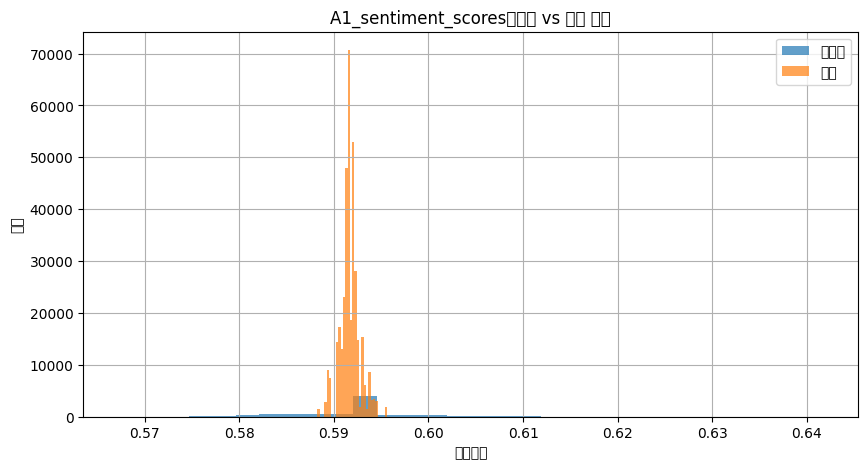

In [ ]:
import matplotlib.pyplot as plt

col = "A1_sentiment_scores"
mask_col = "A1_sentiment_scores_mask"

plt.figure(figsize=(10, 5))
df[df[mask_col] == 1][col].hist(alpha=0.7, label="原始值", bins=30)
df[df[mask_col] == 0][col].hist(alpha=0.7, label="補值", bins=30)
plt.title("A1_sentiment_scores：原始 vs 補值 分布")
plt.xlabel("情緒分數")
plt.ylabel("筆數")
plt.legend()
plt.show()


In [ ]:
for i in range(1, 8):
    col = f"A{i}_sentiment_scores_mask"
    missing_ratio = 1 - df[col].mean()
    print(f"🔧 A{i} 被補值的比例：{missing_ratio:.2%}")


🔧 A1 被補值的比例：97.81%
🔧 A2 被補值的比例：96.03%
🔧 A3 被補值的比例：95.99%
🔧 A4 被補值的比例：93.85%
🔧 A5 被補值的比例：98.73%
🔧 A6 被補值的比例：97.92%
🔧 A7 被補值的比例：96.04%


In [ ]:
# ========== 📦 安裝必要套件 ==========
!pip install xgboost scikit-learn --quiet

# ========== 📁 1. 載入資料 ==========
import pandas as pd

# ✅ 請確認這是你預處理後的資料檔案路徑
df = pd.read_csv("/content/all_reviews-11_補值+mask.csv")
print(f"✅ 資料筆數：{len(df)}")

# ✅ 確認星等欄位名稱是否正確（預設為 'rating'）
df = df[df['rating'].notnull()]
df['rating'] = df['rating'].astype(float)

# ========== 🧮 2. 準備特徵與標籤 ==========
aspect_score_cols = [f"A{i}_sentiment_scores" for i in range(1, 8)]
aspect_mask_cols = [f"{col}_mask" for col in aspect_score_cols]
X = df[aspect_score_cols + aspect_mask_cols]

# ✅ 分類任務：0~4 給模型用，實際輸出時 +1 回到 1~5
y_class = df['rating'].astype(int) - 1
y_reg = df['rating'].astype(float)  # 回歸保留原始 1~5 分

# ========== 🔀 3. 切分訓練 / 測試集 ==========
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# ========== 🧪 4A. 分類模型（XGBoost） ==========
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = XGBClassifier(objective="multi:softmax", num_class=5, eval_metric='mlogloss')
clf.fit(X_train, y_train_class)
y_pred_class = clf.predict(X_test) + 1  # 🔁 加回星等（1~5）

print("\n🎯 分類任務結果 (XGBoost)")
print(classification_report(y_test_class + 1, y_pred_class))  # 測試資料也加回 +1
print("混淆矩陣：\n", confusion_matrix(y_test_class + 1, y_pred_class))

# ========== 🧪 4B. 回歸模型（XGBoost） ==========
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = XGBRegressor()
reg.fit(X_train, y_train_reg)
y_pred_reg = reg.predict(X_test)

print("\n📈 回歸任務結果 (XGBoost)")
print(f"MSE：{mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"MAE：{mean_absolute_error(y_test_reg, y_pred_reg):.4f}")

# ========== 📊 5. 評分與情緒落差分析 ==========
df_pred = df.copy()
df_pred["pred_rating"] = reg.predict(X)
df_pred["pred_rating_round"] = df_pred["pred_rating"].round().clip(1, 5)  # 預測值限制在 1~5
df_pred["rating_gap"] = df_pred["rating"] - df_pred["pred_rating_round"]

# ➤ 正向情緒但低評分
outliers_positive = df_pred[(df_pred["pred_rating"] >= 4.0) & (df_pred["rating"] <= 2)]
print(f"\n😕 有 {len(outliers_positive)} 則「情緒正面但評分很低」的評論")
display(outliers_positive[["rating", "pred_rating", "rating_gap"] + aspect_score_cols].head(10))

# ➤ 負向情緒但高評分
outliers_negative = df_pred[(df_pred["pred_rating"] <= 2.0) & (df_pred["rating"] >= 4)]
print(f"\n😮 有 {len(outliers_negative)} 則「情緒負面但評分很高」的評論")
display(outliers_negative[["rating", "pred_rating", "rating_gap"] + aspect_score_cols].head(10))

✅ 資料筆數：161187

🎯 分類任務結果 (XGBoost)
              precision    recall  f1-score   support

           1       0.46      0.04      0.08      1610
           2       0.23      0.01      0.01       853
           3       0.08      0.00      0.00      2238
           4       0.32      0.03      0.05      6859
           5       0.65      0.99      0.78     20678

    accuracy                           0.64     32238
   macro avg       0.35      0.21      0.19     32238
weighted avg       0.52      0.64      0.52     32238

混淆矩陣：
 [[   70     6     4    45  1485]
 [   21     5     7    34   786]
 [   19     4     3   117  2095]
 [   13     4    10   205  6627]
 [   29     3    14   248 20384]]

📈 回歸任務結果 (XGBoost)
MSE：1.0643
MAE：0.7615

😕 有 9883 則「情緒正面但評分很低」的評論


,rating,pred_rating,rating_gap,A1_sentiment_scores,A2_sentiment_scores,A3_sentiment_scores,A4_sentiment_scores,A5_sentiment_scores,A6_sentiment_scores,A7_sentiment_scores
18,1.0,4.178881,-3.0,0.590521,0.594067,0.594266,0.592426,0.596556,0.596925,0.608281
33,2.0,4.911749,-3.0,0.604387,0.614607,0.594266,0.592426,0.596556,0.585746,0.615689
44,1.0,4.448544,-3.0,0.590521,0.596561,0.594266,0.592426,0.596556,0.596925,0.611757
50,1.0,4.234329,-3.0,0.590521,0.596561,0.594266,0.592426,0.596556,0.596925,0.608281
79,1.0,4.234329,-3.0,0.590521,0.596561,0.594266,0.592426,0.596556,0.596925,0.608281
85,1.0,4.202374,-3.0,0.590521,0.596561,0.594266,0.592107,0.596556,0.596925,0.610737
127,1.0,4.483083,-3.0,0.590521,0.590690,0.603081,0.592351,0.596556,0.596925,0.608281
154,1.0,4.234329,-3.0,0.590521,0.596561,0.594266,0.592426,0.596556,0.596925,0.608281
179,1.0,4.234329,-3.0,0.590521,0.596561,0.594266,0.592426,0.596556,0.596925,0.608281
252,2.0,4.048641,-2.0,0.590521,0.593423,0.594266,0.596824,0.596556,0.596925,0.608281



😮 有 14 則「情緒負面但評分很高」的評論


,rating,pred_rating,rating_gap,A1_sentiment_scores,A2_sentiment_scores,A3_sentiment_scores,A4_sentiment_scores,A5_sentiment_scores,A6_sentiment_scores,A7_sentiment_scores
34440,4.0,1.870823,2.0,0.592123,0.595377,0.584391,0.595328,0.606057,0.586537,0.603777
34978,4.0,1.420993,3.0,0.592123,0.573905,0.596235,0.585232,0.598239,0.586537,0.603777
50775,4.0,1.413419,3.0,0.591908,0.594341,0.593297,0.573974,0.595553,0.597120,0.606115
59436,5.0,0.426004,4.0,0.579751,0.589405,0.593308,0.582808,0.584185,0.599031,0.611562
59697,4.0,0.670020,3.0,0.598914,0.599289,0.593308,0.582709,0.598466,0.599031,0.611562
81632,4.0,1.569810,2.0,0.592421,0.596616,0.584881,0.581877,0.595047,0.594235,0.591030
86429,4.0,1.438661,3.0,0.591661,0.584738,0.598862,0.583950,0.595746,0.595242,0.587950
106920,4.0,1.632310,2.0,0.591203,0.591433,0.598459,0.579478,0.595193,0.599695,0.587426
134242,5.0,1.601570,3.0,0.589653,0.582112,0.595495,0.574975,0.601371,0.588891,0.601922
134943,5.0,1.578572,3.0,0.572537,0.592185,0.598998,0.584385,0.578806,0.599459,0.596728


In [ ]:
# ✅ 安裝 imbalanced-learn（只需執行一次）
!pip install imbalanced-learn --quiet

In [ ]:
# ========== 1️⃣ SMOTE：過採樣少數類別 ==========
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 使用 0~4 為 label 的分類標籤（你應該已經這樣設過）
y_class = df['rating'].astype(int) - 1

# 切分訓練資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# ➤ 執行 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_class)

# ➤ 模型訓練
clf_smote = XGBClassifier(objective="multi:softmax", num_class=5, eval_metric='mlogloss')
clf_smote.fit(X_resampled, y_resampled)

# ➤ 預測
y_pred_smote = clf_smote.predict(X_test) + 1  # 加回 1~5 星

# ➤ 評估
print("\n📊 分類任務（SMOTE 過採樣）結果")
print(classification_report(y_test_class + 1, y_pred_smote))
print("混淆矩陣：\n", confusion_matrix(y_test_class + 1, y_pred_smote))



📊 分類任務（SMOTE 過採樣）結果
              precision    recall  f1-score   support

           1       0.09      0.39      0.15      1610
           2       0.03      0.13      0.05       853
           3       0.14      0.20      0.16      2238
           4       0.26      0.23      0.24      6859
           5       0.74      0.46      0.57     20678

    accuracy                           0.38     32238
   macro avg       0.25      0.28      0.23     32238
weighted avg       0.55      0.38      0.44     32238

混淆矩陣：
 [[ 621  212  176  221  380]
 [ 276  112  111  133  221]
 [ 573  247  437  422  559]
 [1432  762  933 1559 2173]
 [4001 2168 1410 3593 9506]]


In [ ]:
# ========== 2️⃣ class weight：動態調整類別重要性 ==========
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# ➤ 計算每個類別的權重
classes = np.unique(y_train_class)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_class)
class_weights_dict = dict(zip(classes, weights))

# ➤ 將 sample 權重對應到每一列
sample_weights = y_train_class.map(class_weights_dict)

# ➤ 模型訓練
clf_weighted = XGBClassifier(objective="multi:softmax", num_class=5, eval_metric='mlogloss')
clf_weighted.fit(X_train, y_train_class, sample_weight=sample_weights)

# ➤ 預測與評估
y_pred_weighted = clf_weighted.predict(X_test) + 1

print("\n📊 分類任務（class weight 調整）結果")
print(classification_report(y_test_class + 1, y_pred_weighted))
print("混淆矩陣：\n", confusion_matrix(y_test_class + 1, y_pred_weighted))



📊 分類任務（class weight 調整）結果
              precision    recall  f1-score   support

           1       0.10      0.37      0.15      1610
           2       0.03      0.13      0.05       853
           3       0.14      0.18      0.16      2238
           4       0.26      0.23      0.25      6859
           5       0.74      0.48      0.58     20678

    accuracy                           0.39     32238
   macro avg       0.25      0.28      0.24     32238
weighted avg       0.54      0.39      0.45     32238

混淆矩陣：
 [[ 594  205  174  222  415]
 [ 271  110   96  131  245]
 [ 551  237  409  436  605]
 [1318  764  866 1579 2332]
 [3516 2165 1357 3644 9996]]


## 跑2A

In [ ]:
# ========== 📦 安裝必要套件 ==========
!pip install xgboost scikit-learn openpyxl --quiet

# ========== 📁 1. 讀取資料 ==========
import pandas as pd

# 資料載入
review_path = "/content/all_reviews-11_補值+mask.csv"
star_map_path = "/content/星級對照表.xlsx"

df = pd.read_csv(review_path)
star_df = pd.read_excel(star_map_path)

# ⭐ 只保留條件資料（你指定的）
df = df[(df["period_type"] == "months") & (df["blank_type"] == 0)]

# 整合星級欄位
star_df["星級整合"] = star_df["星級整合"].astype(str).str.extract(r"(\d)").astype(int)
df = df.merge(star_df[["hotel_id", "星級整合"]], on="hotel_id", how="left")
df = df[df["星級整合"].notnull()]
df["星級整合"] = df["星級整合"].astype(int)

print(f"✅ 篩選後資料筆數：{len(df)}")

# ========== 🧮 2. 特徵與標籤 ==========
from sklearn.model_selection import train_test_split

# 特徵欄位
aspect_cols = [f"A{i}_sentiment_scores" for i in range(1, 8)]
mask_cols = [f"{col}_mask" for col in aspect_cols]
X = df[aspect_cols + mask_cols]

# ⭐️ y 為 0~5 給模型訓練用
y = df["星級整合"] - 1

# 資料切分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ========== 🧪 3. 多模型訓練與評估 ==========
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 模型集合
models = {
    "XGBoost": XGBClassifier(objective="multi:softmax", num_class=6, eval_metric='mlogloss'),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000, multi_class="multinomial")
}

# 模型訓練與結果報告
for name, model in models.items():
    print(f"\n====== 🔍 模型：{name} ======")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) + 1  # ➕ 回到 1~6 星

    print("🎯 分類報告：")
    print(classification_report(y_test + 1, y_pred, digits=2))
    print("📊 混淆矩陣：")
    print(confusion_matrix(y_test + 1, y_pred))


✅ 篩選後資料筆數：37427

====== 🔍 模型：XGBoost ======
🎯 分類報告：
              precision    recall  f1-score   support

           1       0.98      0.90      0.94       275
           2       1.00      0.83      0.91         6
           3       1.00      0.91      0.95       166
           4       0.98      0.98      0.98      2423
           5       0.98      0.99      0.99      4616

    accuracy                           0.98      7486
   macro avg       0.99      0.92      0.95      7486
weighted avg       0.98      0.98      0.98      7486

📊 混淆矩陣：
[[ 248    0    0    8   19]
 [   0    5    0    1    0]
 [   0    0  151    3   12]
 [   2    0    0 2378   43]
 [   4    0    0   26 4586]]

====== 🔍 模型：RandomForest ======
🎯 分類報告：
              precision    recall  f1-score   support

           1       0.99      0.79      0.88       275
           2       1.00      0.33      0.50         6
           3       1.00      0.75      0.86       166
           4       0.98      0.94      0.96      242

In [ ]:
# ========== 📦 安裝套件 ==========
!pip install xgboost scikit-learn imbalanced-learn openpyxl --quiet

# ========== 📁 1. 讀取資料 ==========
import pandas as pd

# 資料路徑
review_path = "/content/all_reviews-11_補值+mask.csv"
star_map_path = "/content/星級對照表.xlsx"

df = pd.read_csv(review_path)
star_df = pd.read_excel(star_map_path)

# ➤ 只保留條件資料
df = df[(df["period_type"] == "months") & (df["blank_type"] == 0)]

# ➤ 合併星等欄位
star_df["星級整合"] = star_df["星級整合"].astype(str).str.extract(r"(\d)").astype(int)
df = df.merge(star_df[["hotel_id", "星級整合"]], on="hotel_id", how="left")
df = df[df["星級整合"].notnull()]
df["星級整合"] = df["星級整合"].astype(int)

print(f"✅ 篩選後資料筆數：{len(df)}")

# ========== 🧮 2. 特徵與標籤 ==========
from sklearn.model_selection import train_test_split

aspect_cols = [f"A{i}_sentiment_scores" for i in range(1, 8)]
mask_cols = [f"{col}_mask" for col in aspect_cols]
X = df[aspect_cols + mask_cols]
y = df["星級整合"] - 1  # 轉成 0~5 給模型用

# 資料切分
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ========== 🧪 3. SMOTE 過採樣 ==========
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
print(f"✅ SMOTE後樣本數：{len(X_resampled)}，每類別數量一致")

# ========== 🤖 4. 多模型訓練與報告 ==========
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "XGBoost + SMOTE": XGBClassifier(objective="multi:softmax", num_class=6, eval_metric='mlogloss'),
    "RandomForest + SMOTE": RandomForestClassifier(),
    "LogisticRegression + SMOTE": LogisticRegression(max_iter=1000, multi_class="multinomial")
}

for name, model in models.items():
    print(f"\n====== ⚙️ 模型：{name} ======")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test) + 1  # ➕ 回到 1~6 星
    print("🎯 分類報告：")
    print(classification_report(y_test + 1, y_pred, digits=2))
    print("📊 混淆矩陣：")
    print(confusion_matrix(y_test + 1, y_pred))


✅ 篩選後資料筆數：37427
✅ SMOTE後樣本數：92315，每類別數量一致

====== ⚙️ 模型：XGBoost + SMOTE ======
🎯 分類報告：
              precision    recall  f1-score   support

           1       0.77      0.91      0.83       275
           2       1.00      0.83      0.91         6
           3       0.84      0.90      0.87       166
           4       0.97      0.97      0.97      2423
           5       0.99      0.97      0.98      4616

    accuracy                           0.97      7486
   macro avg       0.91      0.92      0.91      7486
weighted avg       0.97      0.97      0.97      7486

📊 混淆矩陣：
[[ 251    0    1   12   11]
 [   1    5    0    0    0]
 [   3    0  149    9    5]
 [  20    0   15 2351   37]
 [  52    0   13   58 4493]]

====== ⚙️ 模型：RandomForest + SMOTE ======
🎯 分類報告：
              precision    recall  f1-score   support

           1       0.74      0.89      0.81       275
           2       1.00      0.83      0.91         6
           3       0.85      0.88      0.87       166
        

In [ ]:
df_pred = df.copy()

# ➤ 計算落差
df_pred["star_diff"] = df_pred["pred_star"] - df_pred["星級整合"]

# ➤ 是否有落差（0 = 無落差，1 = 有）
df_pred["star_gap_flag"] = (df_pred["star_diff"] != 0).astype(int)

# ➤ 判斷落差方向
def classify_gap(val):
    if val > 0:
        return "over"   # 預測比實際高（過度樂觀）
    elif val < 0:
        return "under"  # 預測比實際低（過度悲觀）
    else:
        return "match"

df_pred["gap_direction"] = df_pred["star_diff"].apply(classify_gap)

hotel_gap_summary = df_pred.groupby("hotel_id").agg(
    true_star=("星級整合", "first"),
    pred_star_median=("pred_star", "median"),
    total_reviews=("review_id", "count"),
    gap_count=("star_gap_flag", "sum"),
    over_count=("gap_direction", lambda x: (x == "over").sum()),
    under_count=("gap_direction", lambda x: (x == "under").sum()),
).reset_index()

# ➤ 落差比例
hotel_gap_summary["gap_ratio"] = hotel_gap_summary["gap_count"] / hotel_gap_summary["total_reviews"]


KeyError: 'pred_star'